# CP2410-Assignment 1-Nguyen Hoang Anh


Import neccessary library

In [1]:
import time
import matplotlib.pyplot as plt
import math
from math import log

## Question 1:
https://projecteuler.net/problem=5 . [Pass-level] 2520 is the smallest number that can be divided by each of the numbers from 1 to 10 without any remainder. What is the smallest positive number that is evenly divisible by all of the numbers from 1 to n?

In [2]:
def find_smallest_dividend_2(n):
    if n <= 1:
        return 1
    else:
        step = find_smallest_dividend_2(n - 1)
        if(step%n==0):
            return step
        else:
            number = 1
            found = False
            while not found:
                number += 1
                found = ((step*number)%n ==0)
            return number*step
print(find_smallest_dividend_2(100))

69720375229712477164533808935312303556800


This approach uses recursion to find the smallest value that is divisible by the number from 1 to n-1. Then we find the multiple of this number which is divisible by n.
We see that find_smallest_dividend_2(n) will make (n-1) recursive calls.
in each call, we also conduct a while loop
this while loop in worst case will loop n times if the highest common factor between step value and n is 1. However, the worst case will usually not happen because if n is not a prime numbers, the factors of n are included inside the factors of find_smallest_dividend_2(n - 1)

__Therefore, the big O notation of this algorithm is  O($n^2$).__

In [3]:
def find_gcd(x,y):
    while y:
        x,y =y,x%y
    return x

find_gcd(3,6)
def find_smallest_dividend_1(n):
    if n<=0:
        return False
    elif n==1:
        return 1
    else:
        step=find_smallest_dividend_1(n-1)
        return n*step//find_gcd(n,step)

find_smallest_dividend_1(20)

232792560

This approach is using recursion to find the smallest positive number that can be divided by all number from 1 to n-1, we call this number is f(n-1). Then the result will be the smallest positive number which can be divided by n and f(n-1).

The smallest number between a and b is the product of a and b divided by the highest common factor between a and b. Therefore I define a support class call find_gcd().

We can see that the find_smallest_dividend_1 makes n-1 recursive call.
In each call, find_gcd() is activated. Thus, we need to find the time complexity for find_gcd().
Consider find_gcd(a,b) with b<=a. 
- If b < a/2, then the next step: a,b = b,a%b will make the new value a always less than a/2,since the % operation will remove b or more from a. 
- If b > a/2, then the next step: a,b = b,a%b will make the new value b always less than a/2 since a%b will be less than a<2
- If b==2, it is the best case so we dont consider.
So for each recursive step, the find_gcd() will cut a or b in half.
__Therefore, the big O notation of find_gcd(a,b) is O(log(a)) with a >=b__



Big O notation of find_gcd(n,find_smallest_dividend_1(n-1)) is O(log(find_smallest_dividend_1(n-1))) or O(log(n)). 
- However, find_smallest_dividend_1(n-1) = c*(n-1)=cn-c =< cn with c is a constant. 

__Therefore, big O notation of find_gcd(n,find_smallest_dividend_1(n-1)) is log(n).__

for find_gdc() activation inside the find_smallest_dividend_1(n), the worst case does not usually happen because if n is not prime numbers, the prime factors of n will be included in the prime factors of find_smallest_dividend_1(n).

we have (n-1) calls for find_smallest_dividend_1() function, and in each call we call a find_gcd() function.
 __Therefore, the big O notation of find_smallest_dividend_1() is O(n*log(n)) with log is logarith base 2__

__Because this function uses linear recursion, and it uses O(n) space__

Plot for time execution of find_smallest_dividend_2 in microseconds

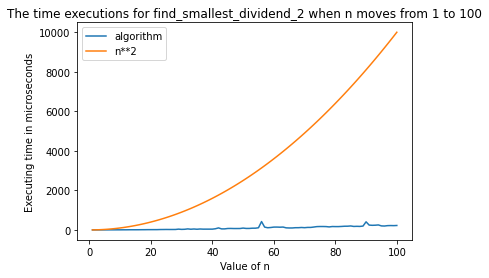

In [4]:
exec_times_1= [] #store executing times in seconds

for n in range(1,101):
    start = time.time()
    find_smallest_dividend_2(n)
    end= time.time()
    exec_times_1.append(end-start)

# I will plot the exec_times in Microseconds (10^-6 seconds)
plt.clf()
plt.plot(list(range(1,101)), [1000000*x for x in exec_times_1])
plt.plot(list(range(1,101)),[n**2 for n in range(1,101)])
plt.title("The time executions for find_smallest_dividend_2 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in microseconds")
plt.legend(['algorithm', 'n**2'])
plt.show()

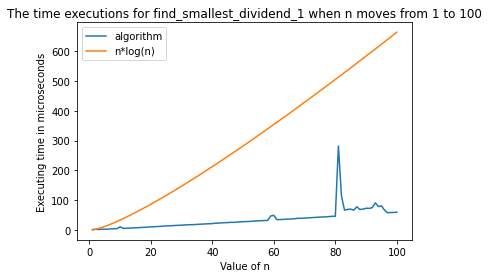

In [5]:
exec_times_2= [] #store executing times in seconds

for n in range(1,101):
    start = time.time()
    find_smallest_dividend_1(n)
    end= time.time()
    exec_times_2.append(end-start)

# I will plot the exec_times in Microseconds 10^-6 seconds
plt.clf()
plt.plot(list(range(1,101)), [1000000*x for x in exec_times_2])
plt.plot(list(range(1,101)),[n*math.log(n,2) for n in range(1,101)])
plt.title("The time executions for find_smallest_dividend_1 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in microseconds")
plt.legend(['algorithm', 'n*log(n)'])
plt.show()

we can see that both algorithm runs fast for n from 1 to 100. therefore I will plot the execution time in 10 microsecond unit

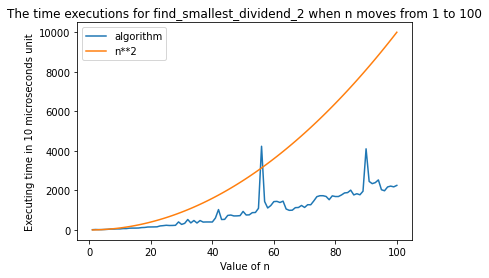

In [6]:
# find_smallest_dividend_2
plt.clf()
plt.plot(list(range(1,101)), [10000000*x for x in exec_times_1])
plt.plot(list(range(1,101)),[n**2 for n in range(1,101)])
plt.title("The time executions for find_smallest_dividend_2 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in 10 microseconds unit")
plt.legend(['algorithm', 'n**2'])
plt.show()

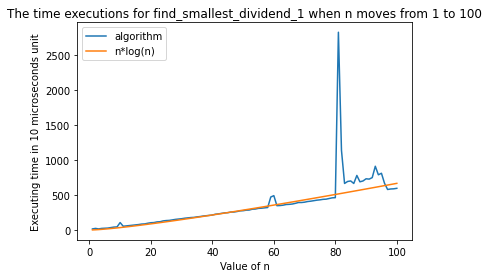

In [7]:
# find_smallest_dividend_1
plt.clf()
plt.plot(list(range(1,101)), [10000000*x for x in exec_times_2])
plt.plot(list(range(1,101)),[n*math.log(n,2) for n in range(1,101)])
plt.title("The time executions for find_smallest_dividend_1 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in 10 microseconds unit")
plt.legend(['algorithm', 'n*log(n)'])
plt.show()

From two plot we can see that find_smallest_dividend_1 had ran faster than find_smallest_dividend_2

## Question 2:
https://projecteuler.net/problem=7 . [Credit-level] By listing the first six prime numbers: 2, 3, 5, 7, 11, and 13, we can see that the 6th prime is 13. What is the n’s prime number?

In [8]:
from math import log
def create_primes_sieve(limit):
    sieve = [True] * limit                          # Initialize the primality list
    sieve[0] = sieve[1] = False

    for (index, isprime) in enumerate(sieve):
        if isprime:
            yield index
            for counter in range(index*index, limit, index):     # Mark factors non-prime
                sieve[counter] = False

def find_nth_prime_3(n):
    if n>=6:
        upper_bound = n*log(n) + n*log(log(n))
    else:
        upper_bound =14
    outcome= 0
    for prime in create_primes_sieve(int(upper_bound)):
        outcome +=1
        if outcome==n:
            return prime
    return outcome
find_nth_prime_3(10001)

104743

This approach is based on the Sieve of Eratosthenes(https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes) where we create an array of boolean which can be used to filter out the primes number up to certain limit. For example, to find all prime numbers under 100, we use create_primes_sieve(100)

In the function  find_nth_prime_3(), I find the upper bound of the nth prime number to use as input of create_primes_sieve. By using prime number theorem (https://en.wikipedia.org/wiki/Prime_number_theorem and http://www.fen.bilkent.edu.tr/~franz/nt/cheb.pdf) we can determine the upper bound of nth prime number nln(n)+nln(ln(n)) for n>=6 (ln is natural log). For the n <6, I choose upper_bound=14 because the 5th prime number is 13.

We can see that create_primes_sieve() has the highest influence to the running time of find_nth_prime_3.

We call "limit" is a number. In create_primes_sieve(limit) with limit is upper bound of nth prime number,  the most outer for will loop "limit" times. However, the outermost and the inner loop are interrelated. In each iteration of inner loop, the value "counter" will run from index^2 to limit which the step equals index value. therefore, in each iteration of outer loop, the inner loop will execute O(limit/index) times with index is a prime number which is less than square root of limit. The number of repeating the innermost part is as follows:
\begin{equation*}
\frac{limit}{2} + \frac{limit}{3} + \frac{limit}{3} + ... + \frac{limit}{k}
\end{equation*}
with k is the largest prime number which is smaller than square root of limit.
This equivalents to:
$$\begin{array}
\cr
limit*\sum_{i=2}^k \frac{1}{k}\cr
limit* (ln(k) + O(1))
\end{array}$$

Because k< sqrt(limit), the big O notation of create_primes_sieve(limit) is
$$\begin{array}
\cr
limit* ln(\sqrt{limit})\cr
limit* \frac{1}{2}*ln(limit) \ (1)
\end{array}$$

because the upper bound of nth prime number nln(n)+nln(ln(n)) for n>=6, (1) can be represented as:
$$\begin{array}
\cr
\left( n*ln(n)+n*ln(ln(n))\right)*ln(\left( n*ln(n)+n*ln(ln(n))\right))
\end{array}$$

because ln(n) <=n:
$$\begin{array}
\cr
n*ln(n)*ln(n*ln(n)) \cr
n*ln(n)*ln(n)+n*ln(n)*ln(ln(n))
\end{array}$$

we see that the most influence part is $n*ln(n)^2$.
The big O notation of find_nth_prime_3(n) is O(g(x)) with g(x) is defined as: O($n*ln(n)^2$).


In [9]:
import ctypes
class DynamicArray:
    """A dynamic array class akin to a simplified Python list."""

    def __init__(self, *args):
        """Create an empty array."""
        self._n = 0  # count actual elements
        self._capacity = 20  # default array capacity
        self._A = self._make_array(self._capacity)  # low-level array
        if len(args) < 1:
            self.resize_factor = 2
        else:
            self.resize_factor = int(args[0])

    def __len__(self):
        """Return number of elements stored in the array."""
        return self._n

    def __getitem__(self, k):
        """Return element at index k."""
        if k==-1:
            k=self._n-1
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]  # retrieve from array

    def append(self, obj):
        """Add object to end of the array."""
        if self._n == self._capacity:  # not enough room
            self._resize(self.resize_factor * self._capacity)  # so double capacity
        self._A[self._n] = obj
        self._n += 1

    def _resize(self, c):  # nonpublic utitity
        """Resize internal array to capacity c."""
        B = self._make_array(c)  # new (bigger) array
        for k in range(self._n):  # for each existing value
            B[k] = self._A[k]
        self._A = B  # use the bigger array
        self._capacity = c

    def _make_array(self, c):  # nonpublic utitity
        """Return new array with capacity c."""
        return (c * ctypes.py_object)()  # see ctypes documentation

    def insert(self, k, value):
        """Insert value at index k, shifting subsequent values rightward."""
        # (for simplicity, we assume 0 <= k <= n in this verion)
        if self._n == self._capacity:  # not enough room
            self._resize(self.resize_factor * self._capacity)  # so double capacity
        for j in range(self._n, k, -1):  # shift rightmost first
            self._A[j] = self._A[j - 1]
        self._A[k] = value  # store newest element
        self._n += 1

    def remove(self, value):
        """Remove first occurrence of value (or raise ValueError)."""
        # note: we do not consider shrinking the dynamic array in this version
        for k in range(self._n):
            if self._A[k] == value:  # found a match!
                for j in range(k, self._n - 1):  # shift others to fill gap
                    self._A[j] = self._A[j + 1]
                self._A[self._n - 1] = None  # help garbage collection
                self._n -= 1  # we have one less item
                return  # exit immediately
        raise ValueError('value not found')  # only reached if no match

In [10]:
from math import log
def find_nth_prime_1(n):
    if n<1:
        return "invalid input"
    elif n==1:
        return 2
    else:
        counter=1 #store the number o
        array_size=n*log(n) + n*log(log(n))
        primes =DynamicArray(array_size) #store the prime numbers
        primes.append(2)
        start=2
        while counter<n:
            start +=1
            if 0 not in [start%prime for prime in primes]:
                primes.append(start)
                counter+=1

        return primes[-1]

find_nth_prime_1(10001)

104743

In the most inner list,  we see that it loops through a list of prime numbers which are smaller than the current number (start).
From prime number theorem as mentioned above,  π(N) ~ N/ln(N) where π(N) is the prime-counting function (the number of primes less than or equal to N) and ln(N) is the natural logarithm of N.

Therefore, in the most inner list comprehension, the for loop will execute num/ln(num) with num equals to current number (which is "start" variable in the code).

Similar to find_nth_prime_2,  while counter<n will go from start=2 to start= nth prime number. in the worst case, nth prime number can go up to n*ln(n)+n*ln(ln(n))

Therefore, the find_nth_prime_2(n) is O(g(x)) with g(x) is:
\begin{equation*}
\sum_{k=2}^m k/ln(k)
\end{equation*}

with m = n*ln(n)+n*ln(ln(n))

because n*ln(n)+n*ln(ln(n)) is the upper limit of nth prime number, we can re-define g(x) as:
\begin{equation*}
m * \frac{m}{ln(m)}
\end{equation*}

with log(m) is natural logarith of m with $$m = n*ln(n)+n*ln(ln(n)$$
 We see that ln(ln(n)) < ln(n), and 1/ln(m) <=1 with m>e , g(x) can be changed to:
$$
n^2*ln(n)^2$$

In this algorithm, we use an implementation of a DynamicArray instead of a Python list. Because Python’s list type can grow arbitrarily long, we use DynamicArray to save the memory used by the algorithm.
This DynamicArray defined here will double the size of array when the capacity of the array is full.
To ensure that the DynamicArray object used in the algorithm will not need the resize, the size of DynamicArray object is set to the upper bound of the nth prime number when it is initialized. Therefore, the DynamicArray can void resizing which requires more steps to migrate the elements in the new array and increases the time execution of the algorithm.
Moreover, DynamicArray provides an O(1) amortized bound for appending new element and accessing an arbitrary element

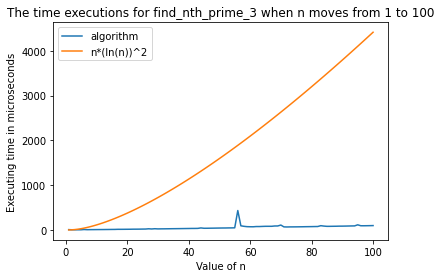

In [11]:
#plotting for find_nth_prime_3

exec_times_1= [] #store executing times in seconds

for n in range(1,101):
    start = time.time()
    find_nth_prime_3(n)
    end= time.time()
    exec_times_1.append(end-start)

# I will plot the exec_times in Microseconds 10^-6 seconds
plt.clf()
plt.plot(list(range(1,101)), [1000000*x for x in exec_times_1])
plt.plot(list(range(1,101)),[n*(math.log(n,2)**2) for n in range(1,101)])
plt.title("The time executions for find_nth_prime_3 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in microseconds")
plt.legend(['algorithm', 'n*(ln(n))^2'])
plt.show()

We could see that the function run very fast even we measure the time in Microseconds.

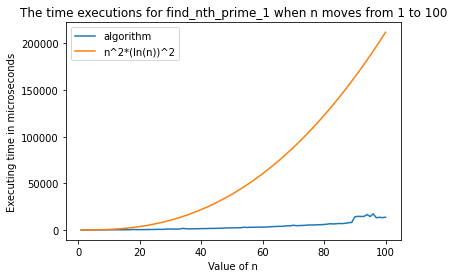

In [12]:

exec_times_2= [] #store executing times in seconds

for n in range(1,101):
    start = time.time()
    find_nth_prime_1(n)
    end= time.time()
    exec_times_2.append(end-start)

# I will plot the exec_times in Microseconds 10^-6 seconds
plt.clf()
plt.plot(list(range(1,101)), [1000000*x for x in exec_times_2])
plt.plot(list(range(1,101)),[(n**2)*(math.log(n)**2)for n in range(1,101)])
plt.title("The time executions for find_nth_prime_1 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in microseconds")
plt.legend(['algorithm', 'n^2*(ln(n))^2'])
plt.show()

we can see that both functions run very fast. Therefore, I decide to plot the execution in 10 microseconds

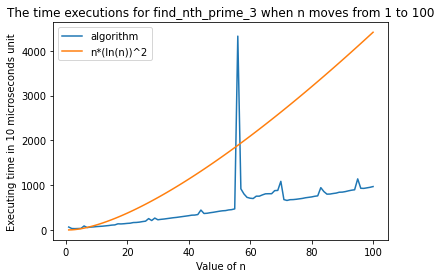

In [13]:
plt.clf()
plt.plot(list(range(1,101)), [10000000*x for x in exec_times_1])
plt.plot(list(range(1,101)),[n*(math.log(n,2)**2) for n in range(1,101)])
plt.title("The time executions for find_nth_prime_3 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in 10 microseconds unit")
plt.legend(['algorithm', 'n*(ln(n))^2'])
plt.show()

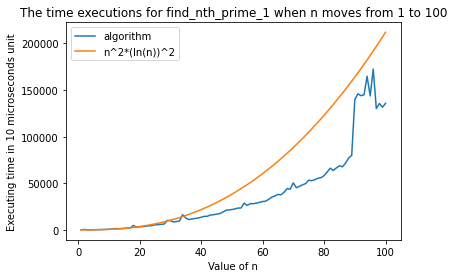

In [14]:
plt.clf()
plt.plot(list(range(1,101)), [10000000*x for x in exec_times_2])
plt.plot(list(range(1,101)),[(n**2)*(math.log(n)**2)for n in range(1,101)])
plt.title("The time executions for find_nth_prime_1 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in 10 microseconds unit")
plt.legend(['algorithm', 'n^2*(ln(n))^2'])
plt.show()

We can see that find_nth_prime_3 usually take lower time to execute than find_nth_prime_1. 
In find_nth_prime_1 plot,we see that the uptrend in the executing time when n increases. The reason is for higher n, we will have more prime numbers stored in the DynamicArray object. So the time taken to loop through the array increase. The reason why the uptrend is not stable because not every time we need to loop through every prime number stored in the DynamicArray.


## Question 3:
https://projecteuler.net/problem=9 . [D-HD level] A Pythagorean triplet is a set of three natural numbers, a < b < c, for which, a2 + b2 = c2. For example, 32 + 42 = 9 + 16 = 25 = 52. Calculate (for any n) if there exists exactly one Pythagorean triplet for which a + b + c = n. If such triplet exists, find and print it.

In [15]:
class Tree:

    class Node:
        __slot__="element","parent","children"
        def __init__(self, element, parent=None):
            self.element = element
            self.parent = parent
            self.children=[]

        def __eq__(self, other):
            """compare the value between two nodes"""
            return self.element==other.element

        def add_child(self,child):
            self.children.append(child)
            child.parent= self

        def has_child(self,node):
            return node in self.children

    def __init__(self,root=None):
        self.root= root

    def add_root(self, root):
        self.root= root

    def return_abc(self):
        lst=[]
        for child in self.root.children:
            lst.append([child.children[0].children[0].element,child.children[0].element, child.element])
        return lst

In [16]:
#Function to generate numbers
#with the help of hint given in question
def find_pytago_triple_3(n):
    tree= Tree()
    tree.add_root(Tree.Node(n))
    for a in range(1,n):
        for b in range(1,n):
            c = n-a-b
            if (a**2+b**2) == c**2:
                if a>=b:
                    a,b=b,a
                a_node = Tree.Node(a)
                b_node=Tree.Node(b)
                c_node= Tree.Node(c)
                if not tree.root.has_child(c_node):
                    tree.root.add_child(c_node)
                    c_node.add_child(b_node)
                    b_node.add_child(a_node)
    return tree.return_abc()
#printing the result
print(find_pytago_triple_3(1000))

[[200, 375, 425]]


For this algorithm, I define a Tree class which is a simple implementation of the Tree data structure. The reason why I use Tree data structure because I think it suitable for storing the number a,b,c. We can add number n as the root, and everytime we find (a,b,c), we can add c as the child node of root, b is the child node of c and a is the child node of b. Therefore we can have good presentation for the triplet (a,b,c) with a<b<c. Moreover, find_pytago_triple_3() may find duplicates of (a,b,c), so before adding c value to the tree, we can check if the root tree has any node that has the value c.

We see that the outermost loop will execute n times, while the inner loop under that loop will also execute n times. This algorithm is a brute-force way to find Pythagorean triplets. 
However, in each execution of the inner loop, we call has_child() method of a Node object. the has_child() method will use "in" operator of Python to check whether the node is in the list of children nodes. The time complexity depends on how many value of c that the number n can have to fulfill the requirements mentioned in the problem.
By substituting $a^2+b^2=c^2$ in the equation $(a+b+c)^2 = n^2$, we can find
\begin{equation*}
c< \sqrt{2}*n
\end{equation*}
we have c>b>a => 3c>a+b+c => c>n/3
The running has_child method is O(n)

__has_child() is called in the inner loop, therefore the running time of find_pytago_triple_3(n) is O(n^3^)__

In [17]:
from math import sqrt
def find_pytago_triple_1(n):
    tree= Tree()
    tree.add_root(Tree.Node(n))
    if n%2!=0:
        return n
    else:
        count=0
        for c in range(n//3+1,int(n*sqrt(2))):
            count+=1
            #I form a formular of a and b if we know c and n
            a=(n-c)/2 - ((n/2-c/2)**2-(n-2*c)*n/2)**0.5
            b=(n-c)/2 + ((n/2-c/2)**2-(n-2*c)*n/2)**0.5
            a=int(a.real)
            b=int(b.real)
            if a**2+b**2==c**2:
                if a<1:
                    continue
                else:
                    a_node = Tree.Node(a)
                    b_node=Tree.Node(b)
                    c_node= Tree.Node(c)
                    tree.root.add_child(c_node)
                    c_node.add_child(b_node)
                    b_node.add_child(a_node)

            else:
                continue
    return tree.return_abc()

find_pytago_triple_1(1000)

[[200, 375, 425]]

The most influence factor on running time of the algorithm is the loop "for c in range(n//3+1,n//2):". In this algorithm, we use Tree class which implement the Tree data structure. The reason to use a Tree is similar to the last algorithm.

Because $a^2+b^2=c^2$ and a+b+c = n, I can create a formula of a and b when n and c values are known. the outermost loop will execute exact int(n*sqrt(2))-n//3+1 times, and this loop has the most influence on the running time of the algorithm. 
This algorithm also does not need to use has_child() method because the values of c in each iteration of the loop will be different.
__Therefore, the running time of find_pytago_triple_1 is O(n).__



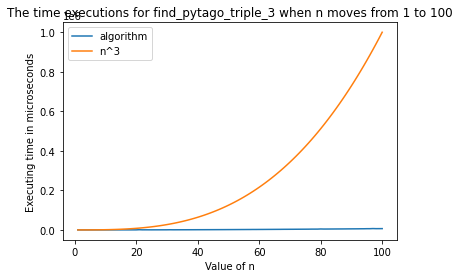

In [18]:
exec_times_1= [] #store executing times in seconds

for n in range(1,101):
    start = time.time()
    find_pytago_triple_3(n)
    end= time.time()
    exec_times_1.append(end-start)

# I will plot the exec_times in Microseconds 10^-6 seconds
plt.clf()
plt.plot(list(range(1,101)), [1000000*x for x in exec_times_1])
plt.plot(list(range(1,101)),[n**3 for n in range(1,101)])
plt.title("The time executions for find_pytago_triple_3 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in microseconds")
plt.legend(['algorithm', 'n^3'])
plt.show()

We can see that this algorithm has very low executing time. This plot can not show how the execution time changes when the n value increases. Thus, the log scale will be applied for n^3 plot.

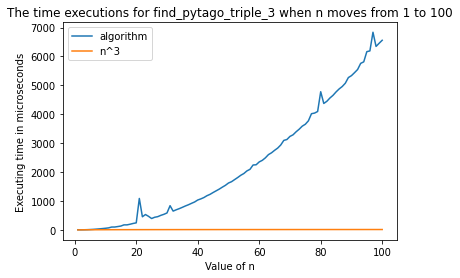

In [19]:
# I will plot the exec_times in Microseconds 10^-6 seconds
plt.clf()
plt.plot(list(range(1,101)), [1000000*x for x in exec_times_1])
plt.plot(list(range(1,101)),[log(n**3) for n in range(1,101)])
plt.title("The time executions for find_pytago_triple_3 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in microseconds")
plt.legend(['algorithm', 'n^3'])
plt.show()

there is an uptrend of execution time as the n value moves from 1 to 100. Because find_pytago_triple_3 uses the brute-force approach, therefore the higher value of n will make two for loops will have to execute more times.

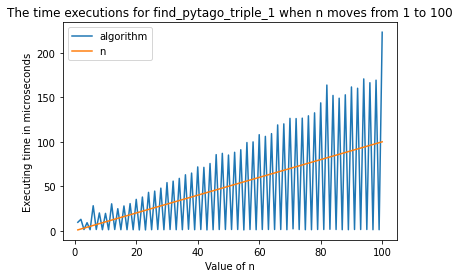

In [20]:
exec_times_2= [] #store executing times in seconds

for n in range(1,101):
    start = time.time()
    find_pytago_triple_1(n)
    end= time.time()
    exec_times_2.append(end-start)

# I will plot the exec_times in Microseconds 10^-6 seconds
plt.clf()
plt.plot(list(range(1,101)), [1000000*x for x in exec_times_2])
plt.plot(list(range(1,101)),[n for n in range(1,101)])
plt.title("The time executions for find_pytago_triple_1 when n moves from 1 to 100")
plt.xlabel("Value of n")
plt.ylabel("Executing time in microseconds")
plt.legend(['algorithm', 'n'])
plt.show()

We can see that find_pytago_triple_1 run much faster than find_pytago_triple_3. Moreover, we can see that the growth rate of execution time of this algorithm is similar to the growth rate of g(n)=n